In [3]:
library(ggplot2)

# Bagian Data Preparation

In [4]:
pelanggan <- read.csv("customer_segments.txt", sep="\t")
head(pelanggan)

Customer_ID,Nama.Pelanggan,Jenis.Kelamin,Umur,Profesi,Tipe.Residen,NilaiBelanjaSetahun
CUST-001,Budi Anggara,Pria,58,Wiraswasta,Sector,9497927
CUST-002,Shirley Ratuwati,Wanita,14,Pelajar,Cluster,2722700
CUST-003,Agus Cahyono,Pria,48,Professional,Cluster,5286429
CUST-004,Antonius Winarta,Pria,53,Professional,Cluster,5204498
CUST-005,"Ibu Sri Wahyuni, IR",Wanita,41,Wiraswasta,Cluster,10615206
CUST-006,Rosalina Kurnia,Wanita,24,Professional,Cluster,5215541


In [5]:
pelanggan_matrix <- data.matrix(pelanggan[c("Jenis.Kelamin", "Profesi", "Tipe.Residen")])
head(pelanggan_matrix)

Jenis.Kelamin,Profesi,Tipe.Residen
1,5,2
2,3,1
1,4,1
1,4,1
2,5,1
2,4,1


In [6]:
pelanggan <- data.frame(pelanggan, pelanggan_matrix)
head(pelanggan)

Customer_ID,Nama.Pelanggan,Jenis.Kelamin,Umur,Profesi,Tipe.Residen,NilaiBelanjaSetahun,Jenis.Kelamin.1,Profesi.1,Tipe.Residen.1
CUST-001,Budi Anggara,Pria,58,Wiraswasta,Sector,9497927,1,5,2
CUST-002,Shirley Ratuwati,Wanita,14,Pelajar,Cluster,2722700,2,3,1
CUST-003,Agus Cahyono,Pria,48,Professional,Cluster,5286429,1,4,1
CUST-004,Antonius Winarta,Pria,53,Professional,Cluster,5204498,1,4,1
CUST-005,"Ibu Sri Wahyuni, IR",Wanita,41,Wiraswasta,Cluster,10615206,2,5,1
CUST-006,Rosalina Kurnia,Wanita,24,Professional,Cluster,5215541,2,4,1


In [7]:
Profesi <- unique(pelanggan[c("Profesi","Profesi.1")])
Profesi

,Profesi,Profesi.1
1,Wiraswasta,5
2,Pelajar,3
3,Professional,4
17,Ibu Rumah Tangga,1
31,Mahasiswa,2


In [8]:
Jenis.Kelamin <- unique(pelanggan[c("Jenis.Kelamin","Jenis.Kelamin.1")])
Jenis.Kelamin

Jenis.Kelamin,Jenis.Kelamin.1
Pria,1
Wanita,2


In [9]:
Tipe.Profesi <- unique(pelanggan[c("Tipe.Residen","Tipe.Residen.1")])
Tipe.Profesi

Tipe.Residen,Tipe.Residen.1
Sector,2
Cluster,1


In [15]:
pelanggan$NilaiBelanjaSetahun <- pelanggan$NilaiBelanjaSetahun/1000000
head(pelanggan$NilaiBelanjaSetahun)

[1] 9.497927e-06 2.722700e-06 5.286429e-06 5.204498e-06 1.061521e-05
[6] 5.215541e-06

In [11]:
field_yang_digunakan = c("Jenis.Kelamin.1", "Umur", "Profesi.1", "Tipe.Residen.1","NilaiBelanjaSetahun")
field_yang_digunakan

[1] "Jenis.Kelamin.1"     "Umur"                "Profesi.1"          
[4] "Tipe.Residen.1"      "NilaiBelanjaSetahun"

# Bagian K-Means

In [12]:
set.seed(100)
sse <- sapply(1:10, function(param_k){kmeans(pelanggan[field_yang_digunakan], param_k, nstart=25)$tot.withinss})
sse

[1] 10990.9740  3016.5612  1550.8725  1064.4187   829.9676   625.1462
 [7]   508.1568   431.6977   374.1095   317.9424

In [13]:
jumlah_cluster_max <- 10
ssdata = data.frame(cluster=c(1:jumlah_cluster_max),sse)
ssdata

cluster,sse
1,10990.9740
2,3016.5612
3,1550.8725
4,1064.4187
5,829.9676
6,625.1462
7,508.1568
8,431.6977
9,374.1095
10,317.9424


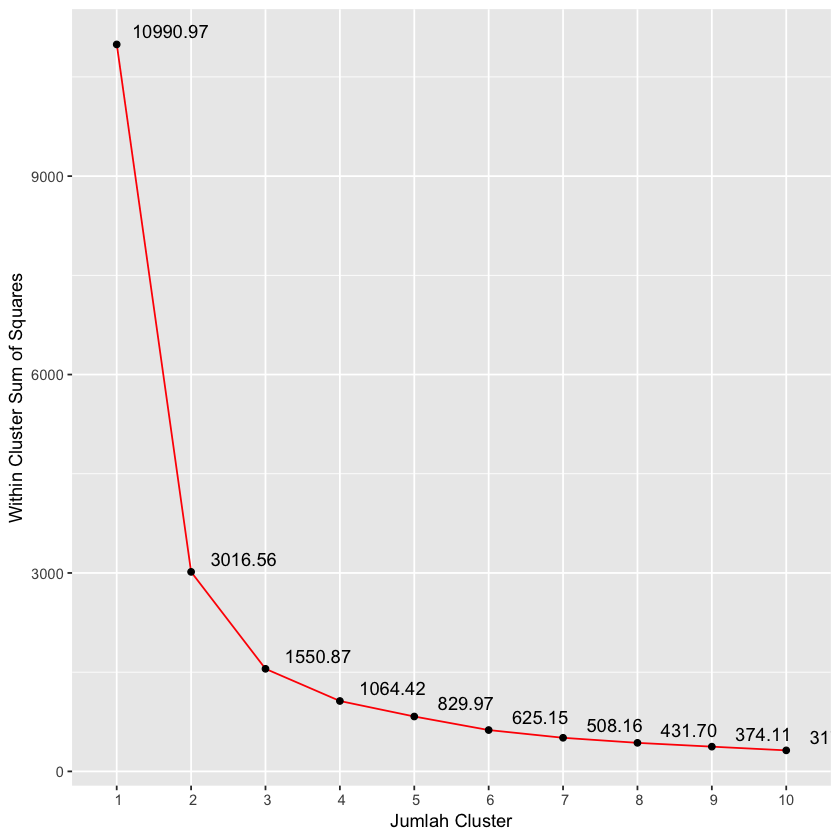

In [14]:
ggplot(ssdata, aes(x=cluster,y=sse)) +
                geom_line(color="red") + geom_point() +
                ylab("Within Cluster Sum of Squares") + xlab("Jumlah Cluster") +
                geom_text(aes(label=format(round(sse, 2), nsmall = 2)),hjust=-0.2, vjust=-0.5) +
  scale_x_discrete(limits=c(1:jumlah_cluster_max))